## Contexto EDA AVOCADO

La siguiente tabla representa los datos semanales de escaneo minorista de 2018 para el volumen minorista nacional (unidades) y el precio. Los datos de escaneo minorista provienen directamente de las cajas registradoras de los minoristas en función de las ventas minoristas reales de aguacates Hass. A partir de 2013, la siguiente tabla refleja un conjunto de datos ampliado de venta minorista de múltiples puntos de venta. Los informes de múltiples medios incluyen una agregación de los siguientes canales: comestibles, masas, clubes, drogas, dólares y militares. El precio promedio (de aguacates) en la tabla refleja un costo por unidad (por aguacate), incluso cuando se venden varias unidades (aguacates) en bolsas. Los códigos de búsqueda de productos (PLU) en la tabla son solo para aguacates Hass. Otras variedades de aguacates (por ejemplo, de piel verde) no se incluyen en esta tabla.

Algunas columnas relevantes en el conjunto de datos:

Date - La fecha de la observación
AveragePrice - el precio medio de un solo aguacate
type - Convencional u orgánico
year - el año
Region - la ciudad o región de la observación
Total Volume - Número total de aguacates vendidos
4046 - Número total de aguacates con PLU 4046 vendidos
4225 - Número total de aguacates con PLU 4225 vendidos
4770 - Número total de aguacates con PLU 4770 vendidos
Agradecimientos
¡Muchas gracias a la Junta de Aguacate Hass por compartir estos datos!

http://www.hassavocadoboard.com/retail/volume-and-price-data

Inspiración
¿En qué ciudades pueden los millenials tomar sus tostadas de aguacate Y comprar una casa?

¿Fue real el Avocadopocalypse de 2017?

- **Date**: Fecha de la transacción o registro.
- **AveragePrice**: Precio promedio del producto en ese período.
- **Total Volume**: Volumen total vendido en la unidad de medida correspondiente.
- **4046**: Código de producto para aguacates convencionales de la variedad Hass.
- **4225**: Código de producto para aguacates orgánicos de la variedad Hass.
- **4770**: Código de producto para aguacates de la variedad Fuerte (orgánicos).
- **Total Bags**: Número total de bolsas vendidas.
- **Small Bags**: Cantidad de bolsas pequeñas vendidas.
- **Large Bags**: Cantidad de bolsas grandes vendidas.
- **XLarge Bags**: Cantidad de bolsas extra grandes vendidas.
- **type**: Tipo de producto (por ejemplo, convencional u orgánico).
- **year**: Año en el que se registraron las ventas.
- **region**: Región geográfica donde se realizaron las ventas.


## Librerías

In [39]:
%pip install calplot

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [40]:
import pandas as pd 
import numpy as np

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import calplot as cpl

In [41]:
df=pd.read_csv(r'C:\Users\maria\Documents\FormacionDataAnalytics\EDA_Avocado\avocado.csv', index_col=0)
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


## Limpieza del set

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18249 entries, 0 to 11
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.9+ MB


In [43]:
# Unificar los nombres de las columnas todo a minísucula y sin espacio
df.columns
renombre_columnas={columna: columna.lower().replace(' ', '_') for columna in df.columns}
df.rename(columns=renombre_columnas, inplace=True)

In [44]:
df.columns

Index(['date', 'averageprice', 'total_volume', '4046', '4225', '4770',
       'total_bags', 'small_bags', 'large_bags', 'xlarge_bags', 'type', 'year',
       'region'],
      dtype='object')

In [45]:
# Cambiar a formato fecha la couman fecha
df['date']=pd.to_datetime(df['date'])
df['date']

0    2015-12-27
1    2015-12-20
2    2015-12-13
3    2015-12-06
4    2015-11-29
        ...    
7    2018-02-04
8    2018-01-28
9    2018-01-21
10   2018-01-14
11   2018-01-07
Name: date, Length: 18249, dtype: datetime64[ns]

In [46]:
df.head()

,date,averageprice,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [47]:
df.shape

(18249, 13)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18249 entries, 0 to 11
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          18249 non-null  datetime64[ns]
 1   averageprice  18249 non-null  float64       
 2   total_volume  18249 non-null  float64       
 3   4046          18249 non-null  float64       
 4   4225          18249 non-null  float64       
 5   4770          18249 non-null  float64       
 6   total_bags    18249 non-null  float64       
 7   small_bags    18249 non-null  float64       
 8   large_bags    18249 non-null  float64       
 9   xlarge_bags   18249 non-null  float64       
 10  type          18249 non-null  object        
 11  year          18249 non-null  int64         
 12  region        18249 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(1), object(2)
memory usage: 1.9+ MB


In [49]:
df['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [50]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
date,18249,2016-08-13 23:30:43.498273792,2015-01-04 00:00:00,2015-10-25 00:00:00,2016-08-14 00:00:00,2017-06-04 00:00:00,2018-03-25 00:00:00,NaN
averageprice,18249.0,1.405978,0.44,1.1,1.37,1.66,3.25,0.402677
total_volume,18249.0,850644.013009,84.56,10838.58,107376.76,432962.29,62505646.52,3453545.355399
4046,18249.0,293008.424531,0.0,854.07,8645.3,111020.2,22743616.17,1264989.081763
4225,18249.0,295154.568356,0.0,3008.78,29061.02,150206.86,20470572.61,1204120.401135
4770,18249.0,22839.735993,0.0,0.0,184.99,6243.42,2546439.11,107464.068435
total_bags,18249.0,239639.20206,0.0,5088.64,39743.83,110783.37,19373134.37,986242.399216
small_bags,18249.0,182194.686696,0.0,2849.42,26362.82,83337.67,13384586.8,746178.514962
large_bags,18249.0,54338.088145,0.0,127.47,2647.71,22029.25,5719096.61,243965.964547
xlarge_bags,18249.0,3106.426507,0.0,0.0,0.0,132.5,551693.65,17692.894652


In [51]:
print(f'La cantidad total de unidades de aguacete vendidos son { df['total_volume'].sum().round(2)}')

La cantidad total de unidades de aguacete vendidos son 15523402593.4


## Evolución del precio y las ventas 

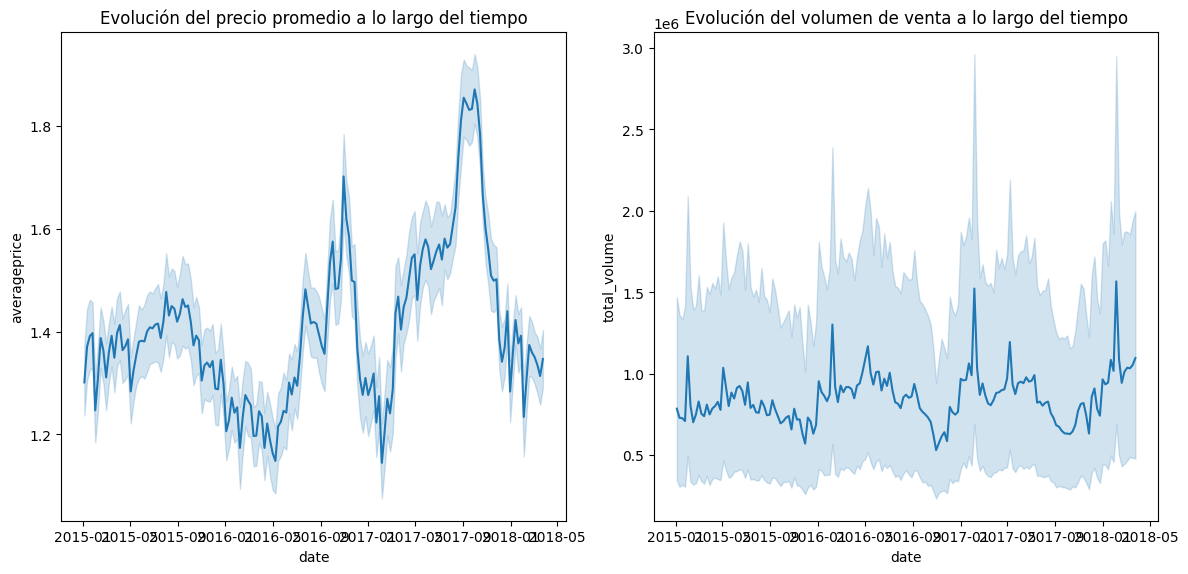

In [52]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(12, 6))

sns.lineplot(x='date', y='averageprice', data=df, ax=axes[0])
axes[0].set_title('Evolución del precio promedio a lo largo del tiempo')


sns.lineplot(x='date', y='total_volume', data=df, ax=axes[1])
axes[1].set_title('Evolución del volumen de venta a lo largo del tiempo')


plt.tight_layout()
plt.show()


findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


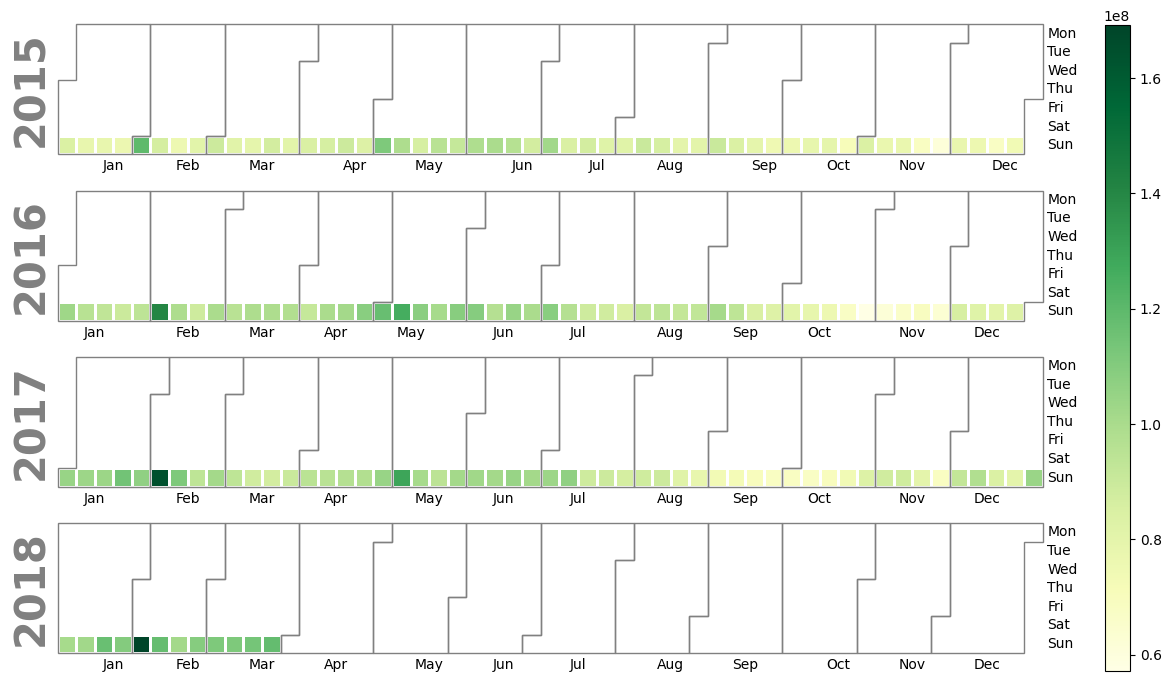

In [53]:


# Asegúrate de que la columna 'date' esté establecida como el índice del DataFrame
df.set_index('date', inplace=True)

# Crear un gráfico de calendario con la columna 'total_volume'
cpl.calplot(df['total_volume'], cmap='YlGn', fillcolor='white')

# Mostrar el gráfico
plt.show()


El gráfico nos aclara que la media de precios se realiza al final de la semana tras las ventas, por ello los domingos como dia fecha.
También nos resalta primeros de febrero como el punto de venta mas altpo de toda la temporada. Esta tendrá que ver con los ciclos de producción. 

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


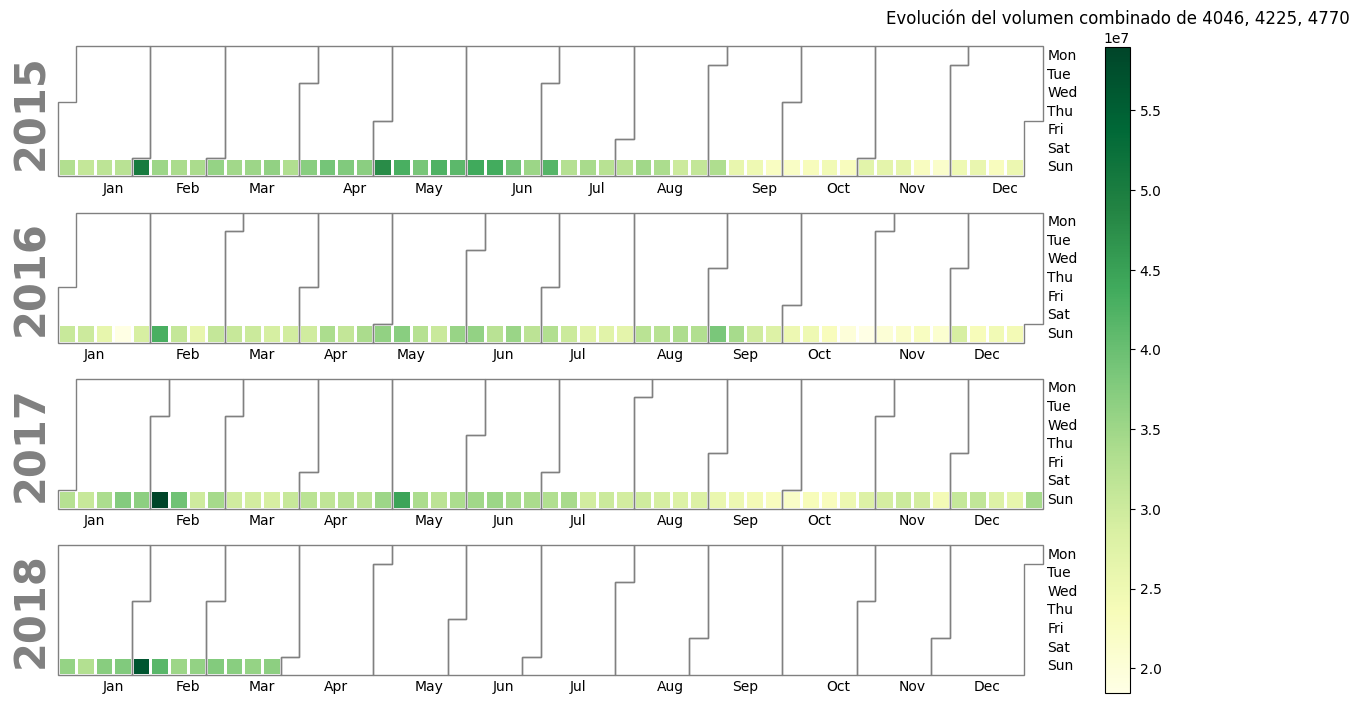

In [60]:
# Crear el gráfico de calendario
cpl.calplot(df['4046'], cmap='YlGn', fillcolor='white')

# Mostrar el gráfico
plt.title('Evolución del volumen combinado de 4046, 4225, 4770')
plt.show()


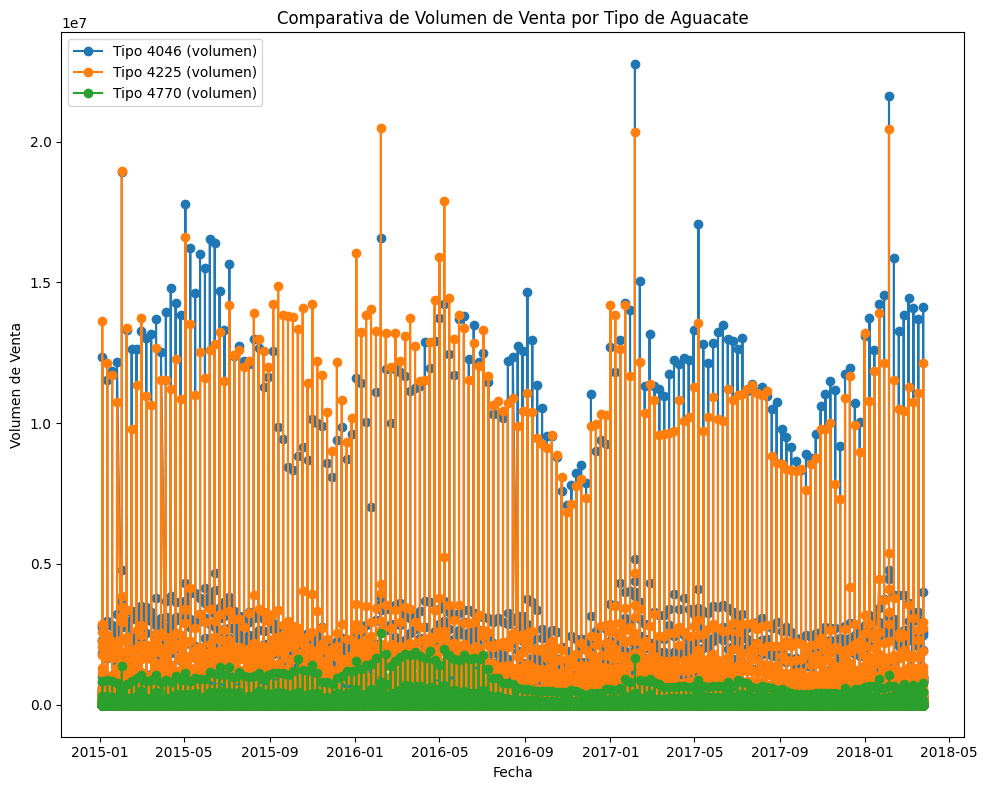

In [67]:
df.sort_index(inplace=True)

# Crear los subplots, uno para el volumen de ventas y otro para el precio
fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(10, 8))

# Gráfico 1: Comparativa de volumen de ventas
ax1.plot(df.index, df['4046'], marker='o', label='Tipo 4046 (volumen)')
ax1.plot(df.index, df['4225'], marker='o', label='Tipo 4225 (volumen)')
ax1.plot(df.index, df['4770'], marker='o', label='Tipo 4770 (volumen)')

# Añadir título, etiquetas y leyenda al gráfico 1
ax1.set_title('Comparativa de Volumen de Venta por Tipo de Aguacate')
ax1.set_xlabel('Fecha')
ax1.set_ylabel('Volumen de Venta')
ax1.legend()

# Gráfico 2: Comparativa de precio promedio

# Ajustar el espacio entre subplots para evitar solapamientos
plt.tight_layout()

# Mostrar el gráfico
plt.show()


In [76]:

# Crear un nuevo DataFrame con las sumas de cada variedad
df_ventas_variedad = pd.DataFrame({
    'variedad': ['4046', '4225', '4770'],
    'total_ventas': [df['4046'].sum(), df['4225'].sum(), df['4770'].sum()]
}).reset_index(drop=True)

# Mostrar el DataFrame
print(df_ventas_variedad)


  variedad  total_ventas
0     4046  5.347111e+09
1     4225  5.386276e+09
2     4770  4.168023e+08


In [78]:
pie = px.pie(df_ventas_variedad, names= 'variedad', values='total_ventas',
             color = ['4046', '4225', '4770'],
             color_discrete_map = {'4046': '#30BFDD',
                                   '4225': '#8690FF',
                                   '4770': '#ACD0F4'})
pie.update_layout(title = dict(text = "Distribución de ventas por variedad de aguacate", 
															 font = dict(size = 20),
															 automargin = True, 
															 yref = 'paper',
															 x = 0.5,
															 y = 1),
							    legend = dict(yanchor = "top",
														    y = 0.99,
														    xanchor = "right",
														    x = 0.75))
pie.show()

## Distribució geografica de ventas

In [113]:
df_ventas_region= df.groupby('region')['total_volume'].sum().reset_index()
df_ventas_region = df_ventas_region.sort_values(by='total_volume', ascending=False)
df_ventas_region=df_ventas_region[df_ventas_region['region']!='TotalUS']
df_ventas_region=df_ventas_region.head(5)


<BarContainer object of 5 artists>

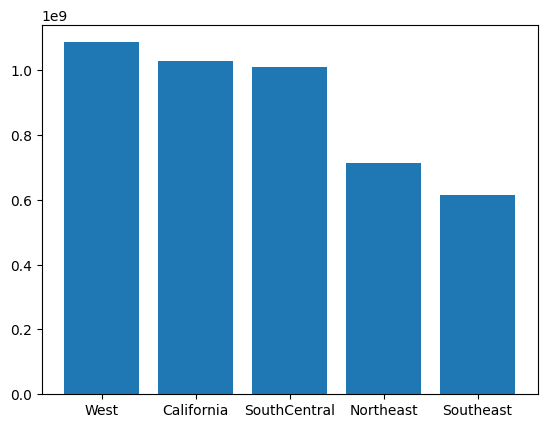

In [114]:
fig, ax=plt.subplots()

ax.bar(data=df_ventas_region, x='region', height ='total_volume' )